In [83]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

import tensorflow as tf

In [62]:
df = pd.read_csv("diabetes.csv")

In [63]:
df.head(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1


In [64]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [65]:
df['Outcome']==1

0       True
1      False
2       True
3      False
4       True
       ...  
763    False
764    False
765    False
766     True
767    False
Name: Outcome, Length: 768, dtype: bool

In [66]:
df[df['Outcome']==1]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
2,8,183,64,0,0,23.3,0.672,32,1
4,0,137,40,35,168,43.1,2.288,33,1
6,3,78,50,32,88,31.0,0.248,26,1
8,2,197,70,45,543,30.5,0.158,53,1
...,...,...,...,...,...,...,...,...,...
755,1,128,88,39,110,36.5,1.057,37,1
757,0,123,72,0,0,36.3,0.258,52,1
759,6,190,92,0,0,35.5,0.278,66,1
761,9,170,74,31,0,44.0,0.403,43,1


In [67]:
len(df[df['Outcome']==1]),len(df[df['Outcome']==0])

(268, 500)

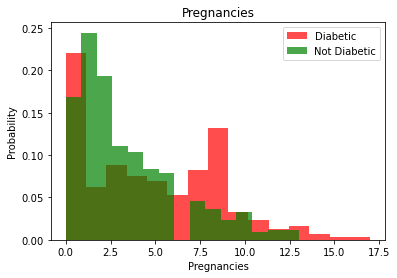

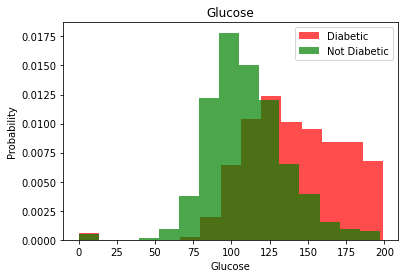

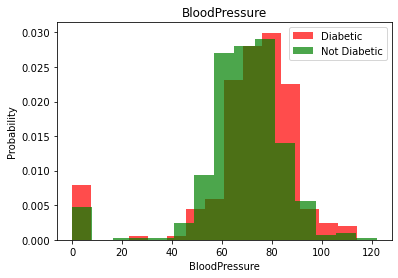

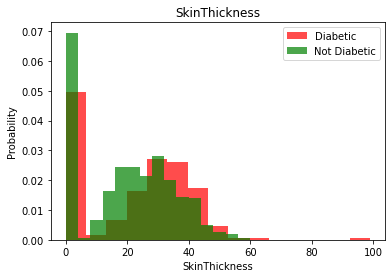

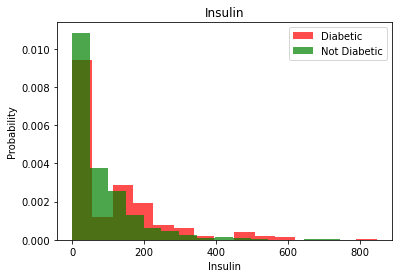

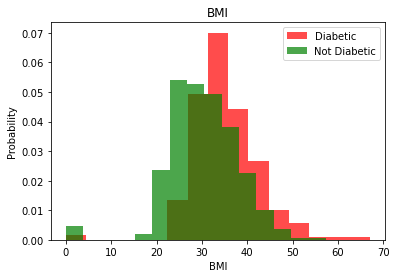

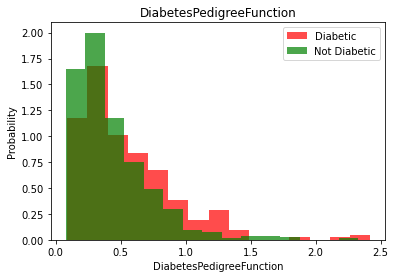

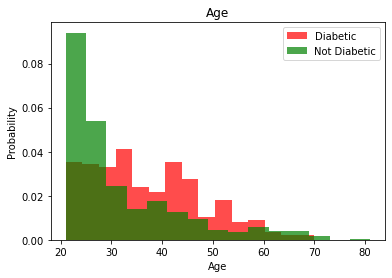

In [68]:
## run through all columns except the last one for plotting histogram
for i in range(len(df.columns[:-1])): 
    label = df.columns[i]
    plt.hist(df[df['Outcome']==1][label], color = 'red', label = "Diabetic", alpha = 0.7, density = True, bins =15)
    plt.hist(df[df['Outcome']==0][label], color = 'green', label = "Not Diabetic", alpha = 0.7, density = True, bins =15)
    plt.title(label)
    plt.ylabel("Probability")
    plt.xlabel(label)
    plt.legend()
    plt.show()
    

In [69]:
X = df[df.columns[:-1]]

In [70]:
X

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33
...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63
764,2,122,70,27,0,36.8,0.340,27
765,5,121,72,23,112,26.2,0.245,30
766,1,126,60,0,0,30.1,0.349,47


In [71]:
X = df[df.columns[:-1]].values

In [72]:
X

array([[  6.   , 148.   ,  72.   , ...,  33.6  ,   0.627,  50.   ],
       [  1.   ,  85.   ,  66.   , ...,  26.6  ,   0.351,  31.   ],
       [  8.   , 183.   ,  64.   , ...,  23.3  ,   0.672,  32.   ],
       ...,
       [  5.   , 121.   ,  72.   , ...,  26.2  ,   0.245,  30.   ],
       [  1.   , 126.   ,  60.   , ...,  30.1  ,   0.349,  47.   ],
       [  1.   ,  93.   ,  70.   , ...,  30.4  ,   0.315,  23.   ]])

In [73]:
y = df[df.columns[-1]].values

In [97]:
y #1D ARRAY

array([1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1,
       1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0,
       1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0,
       1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0,
       0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1,

In [98]:
X.shape, y.shape ## X is 2d and y is 1d

((768, 8), (768,))

In [99]:
scaler = StandardScaler()
X = scaler.fit_transform(X)
data = np.hstack((X,np.reshape(y,(-1,1))))
transformed_df = pd.DataFrame(data, columns=df.columns)

In [94]:
X ## now everythig is a lot closer in range

array([[ 0.63994726,  0.84832379,  0.14964075, ...,  0.20401277,
         0.46849198,  1.4259954 ],
       [-0.84488505, -1.12339636, -0.16054575, ..., -0.68442195,
        -0.36506078, -0.19067191],
       [ 1.23388019,  1.94372388, -0.26394125, ..., -1.10325546,
         0.60439732, -0.10558415],
       ...,
       [ 0.3429808 ,  0.00330087,  0.14964075, ..., -0.73518964,
        -0.68519336, -0.27575966],
       [-0.84488505,  0.1597866 , -0.47073225, ..., -0.24020459,
        -0.37110101,  1.17073215],
       [-0.84488505, -0.8730192 ,  0.04624525, ..., -0.20212881,
        -0.47378505, -0.87137393]])

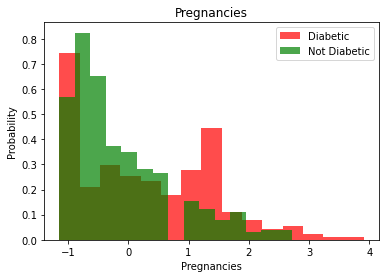

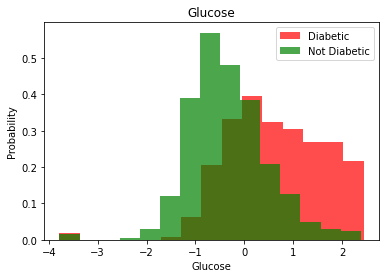

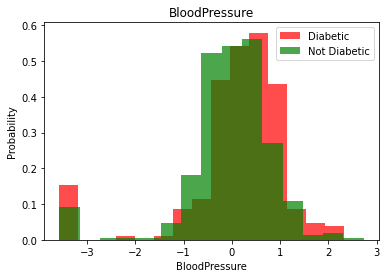

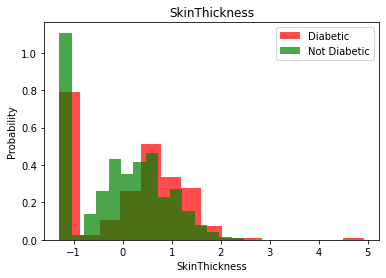

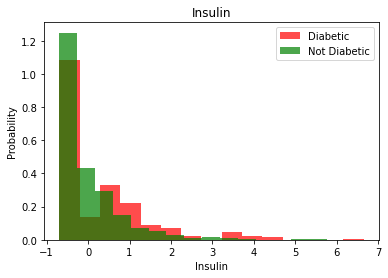

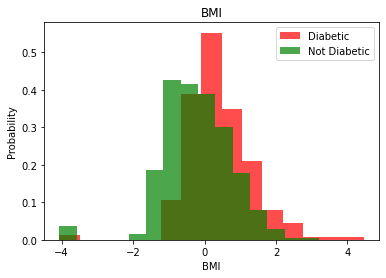

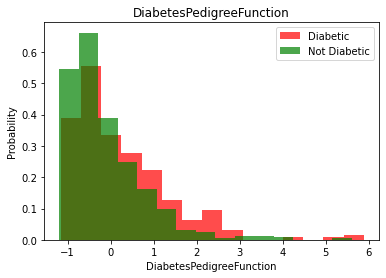

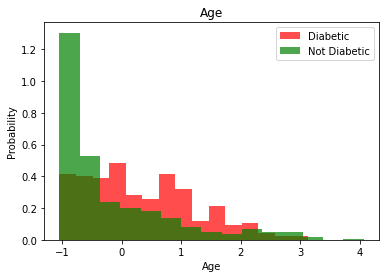

In [96]:
## run through all columns except the last one for plotting histogram
for i in range(len(df.columns[:-1])): 
    label = df.columns[i]
    plt.hist(transformed_df[transformed_df['Outcome']==1][label], color = 'red', label = "Diabetic", alpha = 0.7, density = True, bins =15)
    plt.hist(transformed_df[transformed_df['Outcome']==0][label], color = 'green', label = "Not Diabetic", alpha = 0.7, density = True, bins =15)
    plt.title(label)
    plt.ylabel("Probability")
    plt.xlabel(label)
    plt.legend()
    plt.show()

### Training and Test datasets 

- scikits-learn's train_test_split //// sklearn.model_selection.train_test_split
- Split arrays and matrices into random train and test subsets



In [75]:
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size = 0.4, random_state = 0)
#60% for training, 20-20% for validate and test 
#X_temp and y_temp are the X and y values but only 40% of them each
X_valid, X_test, y_valid, y_test = train_test_split(X_temp,y_temp, test_size = 0.5, random_state = 0)

### The Neural Net

In [76]:
# Class Sequential: Sequential groups a linear stack of layers into tf.keras.Model 
# (we need this as our NN is exacly like a stack of layers)
## dense nn - takes input from everything & outputs a value
## relu - if x <=0--> 0, if x>0-->x
## third layer has sigmoid function to map our input to a probability of whether or not something belongs to a single class
model = tf.keras.Sequential([
                                tf.keras.layers.Dense(16, activation = 'relu'),
                                tf.keras.layers.Dense(16, activation = 'relu'),
                                tf.keras.layers.Dense(1, activation = 'sigmoid')
])

In [78]:
# Compiling the Model
## choose from the tensorflow optimizers --> here Adam is used
## learning_rate = 0.001 is default
## Binary Classification is being done
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
             loss = tf.keras.losses.BinaryCrossentropy(),
             metrics =['accuracy']) 

Now we have a NN model that we can feed data to and train
-- before doing this we can see how our training and validation data perform

In [80]:
model.evaluate(X_train, y_train)

15/15 [==============================] - 1s 3ms/step - loss: 4.9226 - accuracy: 0.6022


[4.922613143920898, 0.602173924446106]

In [81]:
model.evaluate(X_valid, y_valid)

5/5 [==============================] - 0s 2ms/step - loss: 4.2723 - accuracy: 0.5844


[4.2722930908203125, 0.5844155550003052]

In [82]:
##fixing losses and accuracy
## batch_size : term that refers to the number of samples/training examples that is used in every single itiration
## validation_data : to checkwhat the validation loss and validation accuracy s=is after every epoch (epoch = the number of itirations)
model.fit(X_train, y_train, batch_size = 16, epochs = 20, validation_data = (X_valid, y_valid))

Epoch 1/20
29/29 [==============================] - 1s 6ms/step - loss: 3.0993 - accuracy: 0.4848 - val_loss: 1.7103 - val_accuracy: 0.4740
Epoch 2/20
29/29 [==============================] - 0s 3ms/step - loss: 1.8226 - accuracy: 0.5130 - val_loss: 1.1993 - val_accuracy: 0.4610
Epoch 3/20
29/29 [==============================] - 0s 5ms/step - loss: 1.2350 - accuracy: 0.5478 - val_loss: 0.8489 - val_accuracy: 0.6104
Epoch 4/20
29/29 [==============================] - 0s 6ms/step - loss: 0.9397 - accuracy: 0.6261 - val_loss: 0.7962 - val_accuracy: 0.5714
Epoch 5/20
29/29 [==============================] - 0s 5ms/step - loss: 0.8245 - accuracy: 0.6174 - val_loss: 0.7709 - val_accuracy: 0.6623
Epoch 6/20
29/29 [==============================] - 0s 4ms/step - loss: 0.8658 - accuracy: 0.6239 - val_loss: 0.9032 - val_accuracy: 0.5844
Epoch 7/20
29/29 [==============================] - 0s 4ms/step - loss: 0.7320 - accuracy: 0.6761 - val_loss: 0.6964 - val_accuracy: 0.6623
Epoch 8/20
29/29 [==

Our features are so different in range (BMI is 0-2.5; Skin thickness is 0 to 100, etc) that it could be messing up our results ----- so we will instead be scaling our results so that all of them are on a more standardized range --- import a package that lets us scale

--- see [99] 
